In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x kaggle_simpson_testset.rar

In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model


from sklearn.metrics import confusion_matrix
import itertools
import os 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [33]:
test_path = '/content/kaggle_simpson_testset'

In [34]:
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)


Found 496 images belonging to 10 classes.


##Loading

In [35]:
from keras import models

In [36]:
new_model = models.load_model( '/content/drive/MyDrive/ML_models/2_simpsons_identifier_TL.h5')

In [37]:
predictions = new_model.predict(x=test_batches, verbose=0)

##Testing - Confusion Matrix

In [38]:
test_labels = test_batches.classes

In [ ]:
test_batches.class_indices

In [40]:
def plot_confusion_matrix(cm, classes,
                            normalize = False,
                            title= 'Confusion matrix',
                            cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize :
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        print("Normalized confusion matrix")
    else:
        print('confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
          horizontalalignment = "center",
          color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

confusion matrix without normalization
[[49  1  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  1  0  0 49  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  1]
 [ 0  0  1  0  0  0 48  0  0  0]
 [ 0  4  0  0  0  0  0 46  0  0]
 [ 0  1  1  0  0  0  0  0 47  0]
 [ 0  1  0  0  0  0  0  0  0 49]]


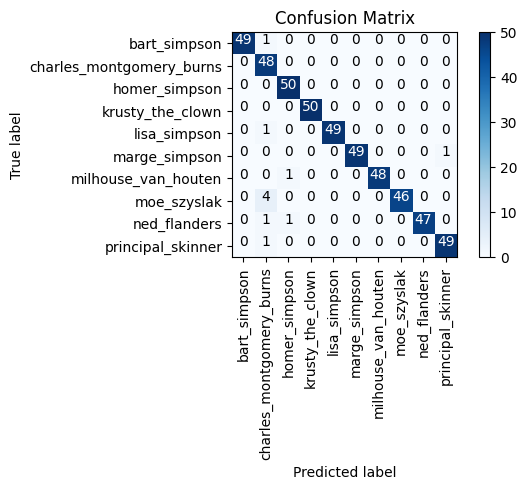

In [42]:
cm_plot_labels = ['bart_simpson','charles_montgomery_burns','homer_simpson','krusty_the_clown','lisa_simpson','marge_simpson','milhouse_van_houten','moe_szyslak','ned_flanders','principal_skinner']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

##Testing - Single image

In [43]:
def prepare_image(file):
  img_path = '/content/kaggle_simpson_testset/bart_simpson/'
  img = image.load_img(img_path + file, target_size=(224,224))
  img_array = image.img_to_array(img)
  img_array_expanded_dims = np.expand_dims(img_array, axis=0)
  return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

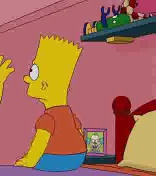

In [44]:
from IPython.display import Image
Image(filename='/content/kaggle_simpson_testset/bart_simpson/bart_simpson_0.jpg', width=300,height=200)

In [45]:
preprocessed_image = prepare_image('bart_simpson_0.jpg')

In [ ]:
predictions = new_model.predict(preprocessed_image)

In [47]:
im_class = np.argmax(predictions[0], axis=-1)

In [48]:
print(cm_plot_labels[im_class])

bart_simpson
